In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from time import time

In [3]:
def inputData():
    dfX = pd.read_csv("./data/q1/linearX.csv",usecols=[0],names=["X"],header=None)
    inputListX=dfX['X'].tolist()
    dfY = pd.read_csv("./data/q1/linearY.csv",usecols=[0],names=["Y"],header=None)
    inputListY=dfY['Y'].tolist()
    return inputListX,inputListY

    

In [4]:
# plt.scatter(inputListX,inputListY)
# plt.title("linear regression" )
# plt.show()

In [5]:
def normalize(data):
    mean = np.mean(data)
    std = np.std(data)
    data = data -mean
    data = data/std
    return data
    

In [6]:
# batch Gradient descent 

In [7]:
# step 1: creating input DATA
#         Making Design matrix "X" with X0=1

def align(inputListX,inputListY):
    numpyListX = normalize(np.reshape(np.array(inputListX),(-1,1)))
    numpyListY = np.reshape(np.array(inputListY),(-1,1))
    data = np.append( numpyListX,numpyListY, axis = 1)

    np.random.shuffle(data)  #shuffling data to make it random for better distribution

    x = data[:, 0 : 1]  #copy all rows and only copy zeroth col [0,1)
    y = data[:, 1 : 2]  #copy all rows and only copy first col [1,2)
    ones = np.ones((x.shape[0], 1))
    X = np.append(ones, x, axis = 1)
    return x,y,X
# print(numpyListX.shape)
# print(ones.shape)
# print(X.shape)

In [8]:
#step 2: create theta vector 

# theta = np.zeros((X.shape[1],1))
# print(theta.shape)
# print(theta)

In [9]:
# step 3: define a cost function

def costFuction(y,X,theta):
    hypothesis = np.dot(X,theta)
    error = y-hypothesis
    errorSquared =error**2
    examples = X.shape[0] #X.shape[0] represents number of training example
    return np.sum(errorSquared)/(2*examples) 


    

In [10]:
#step 4: define a gradient function

# def gradientFunction(X,y,theta):
#     error = np.dot(X,theta) - y
#     grad_cost=np.zeros((2,1))
#     for i in range(X.shape[0]):
#         for j in range(grad_cost.shape[0]):
#             grad_cost[j]+= error[i]*X[i,j]
#     op =  grad_cost/(X.shape[0])
#     return op

# gc = np.reshape(np.array([2,3]),(2,1))
# print(gc)
# dummyx = np.array([1,2,1,4,1,5,1,6,1,7])
# dummyx=np.reshape(np.array(dummyx),(-1,2))
# print(dummyx[:,1:2])
# print()

def gradientFunction(X,y,theta):
    error = np.dot(X,theta) - y  # h(X) -y
    grad_cost = np.zeros((2,1))
    grad_cost[0] = np.sum(error*X[:,0:1])/(X.shape[0])
    grad_cost[1] = np.sum(error*X[:,1:2])/(X.shape[0])
    return grad_cost
        

In [23]:
# implement gradient descent unitil it converges

def gradientDescent():
    (inputListX,inputListY) = inputData()
    (x,y,X) = align(inputListX,inputListY)
    
    theta = np.zeros((X.shape[1],1))  # initializing theta vector

    learningRate = 1.3
    
    #first iteration to implement de while 
    oldTheta = theta.copy()  #theta(t)
    theta -= learningRate*gradientFunction(X,y,theta) #theta(t+1)

    costPlot = [] # list for plot of costfunction
    costPlot.append(costFuction(y,X,theta))
    while(abs(costFuction(y,X,theta) - costFuction(y,X,oldTheta)) > 1e-15 ):
#     for k in range(200000):
        oldTheta = theta.copy()
        theta -= learningRate*gradientFunction(X,y,theta)
        costPlot.append(costFuction(y,X,theta))
    return x,y,X,theta,costPlot


In [24]:
def plot():
    start=time()
    (x,y,X,theta,costPlot) = gradientDescent()
    end =time() -start
    print("total time {}".format(end))
    # plot data point and hypothesis
    plt.scatter(x,y)
    plt.plot(x,theta[0]+x*theta[1] , color='r')
    plt.title("linear regression" )
    plt.show()

    #plot cost function
    plt.plot(costPlot)
    plt.show()

total time 0.01595926284790039


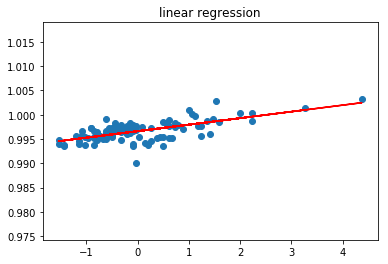

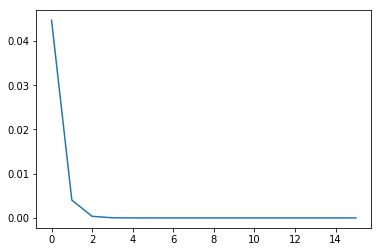

In [25]:
plot()

In [15]:
# lst=np.array([1,2,3])

In [18]:
# lst?